In [34]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from scipy.spatial.distance import pdist
from sklearn.model_selection import ParameterGrid
from sklearn.manifold import TSNE

from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

# Load data

In [35]:
cho_data = pd.read_csv('cho.txt', sep='\t')
iyer_data = pd.read_csv('iyer.txt', sep='\t')

# Remove outliers
iyer_data = iyer_data[iyer_data['-1'] != -1]

# Basic Data Exploration

In [36]:
X_iyer = iyer_data.drop(columns=['1', '-1'])
y_iyer = iyer_data['-1']

print(f'Iyer dataset: {len(y_iyer.unique())} clusters')

Iyer dataset: 10 clusters


In [37]:
X_cho = cho_data.drop(columns=['1', '1.1'])
y_cho = cho_data['1.1']

print(f'Cho dataset: {len(y_cho.unique())} clusters')

Cho dataset: 5 clusters


In [38]:
X_iyer

,1.0,0.72,0.1,0.57,1.08,0.66,0.39,0.49,0.28,0.5,0.66.1,0.52
0,1.0,1.58,1.05,1.15,1.22,0.54,0.73,0.82,0.82,0.90,0.73,0.75
1,1.0,1.10,0.97,1.00,0.90,0.67,0.81,0.88,0.77,0.71,0.57,0.46
2,1.0,0.97,1.00,0.85,0.84,0.72,0.66,0.68,0.47,0.61,0.59,0.65
3,1.0,1.21,1.29,1.08,0.89,0.88,0.66,0.85,0.67,0.58,0.82,0.60
4,1.0,1.45,1.44,1.12,1.10,1.15,0.79,0.77,0.78,0.71,0.67,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...
511,1.0,1.30,2.78,5.20,2.95,2.31,3.08,2.77,1.87,1.77,1.66,1.72
512,1.0,2.41,3.57,7.18,4.86,3.10,3.58,3.93,2.28,2.19,2.16,2.23
513,1.0,2.09,3.37,5.52,4.89,3.05,3.27,4.29,2.72,2.15,2.05,2.25
514,1.0,1.52,4.39,7.03,5.45,2.93,3.91,4.44,2.40,1.97,2.21,1.79


In [39]:
X_cho

,-0.69,-0.96,-1.16,-0.66,-0.55,0.12,-1.07,-1.22,0.82,1.4,0.71,0.68,0.11,-0.04,0.19,0.82.1
0,-0.21,0.19,0.86,0.04,-0.35,-0.39,-0.51,-0.20,0.00,0.77,0.41,0.14,-0.450,-1.230,-0.325,0.00
1,-0.30,-0.56,-0.29,-0.50,-0.27,-0.29,-0.56,-1.04,0.32,0.90,0.45,0.17,0.164,-0.120,-0.160,0.67
2,0.07,0.26,-0.47,-0.68,-0.63,-0.39,0.07,0.79,0.58,0.31,-0.14,-0.29,-0.103,-0.200,-0.060,0.36
3,-1.04,0.13,0.51,-0.44,-0.88,-0.32,0.21,0.95,1.07,0.38,0.01,-0.13,-0.780,-0.130,0.092,0.00
4,-1.17,0.09,-0.52,-1.04,-1.16,-0.83,0.17,0.93,0.89,0.52,-0.24,-0.46,-0.215,0.200,0.910,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,-0.64,-0.76,-0.55,-0.68,-0.66,-0.09,0.26,0.41,0.51,0.18,0.09,-0.23,0.040,0.274,0.980,0.52
381,-0.01,-0.82,-0.65,-0.43,-0.28,-0.48,0.23,0.58,0.31,0.15,-0.24,-0.52,0.021,0.370,0.570,0.65
382,-3.12,-4.12,-3.54,-1.54,-0.37,1.48,2.45,2.77,1.81,-0.26,-0.73,0.34,0.710,1.480,2.060,2.36
383,-0.79,-0.56,-0.79,-0.23,-0.53,-0.14,0.61,0.95,0.96,0.38,-0.11,-0.31,-0.410,0.490,0.080,0.15


In [40]:
y_iyer.value_counts()

-1
2     145
1     100
8      63
4      43
3      34
6      34
10     25
9      19
7      14
5       7
Name: count, dtype: int64

In [41]:
y_cho.value_counts()

1.1
2    135
3     75
1     66
5     55
4     54
Name: count, dtype: int64

In [42]:
# Standardize the features
scaler = StandardScaler()
X_iyer_scaled = scaler.fit_transform(X_iyer)
X_cho_scaled = scaler.fit_transform(X_cho)

# Cluster Visualization Function

PCA


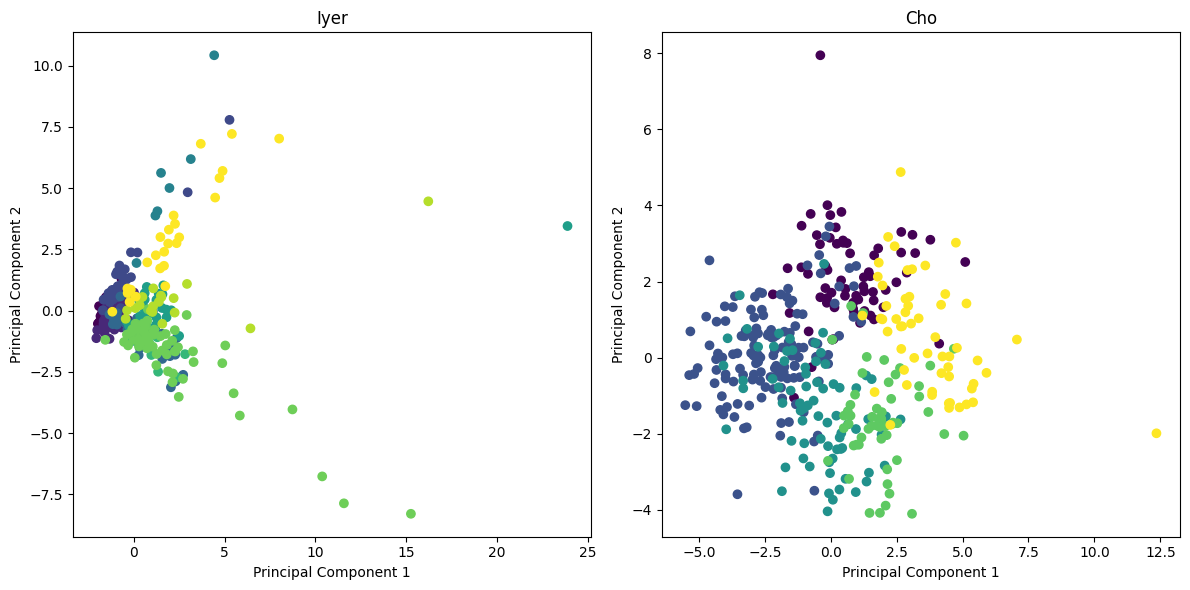

t-SNE


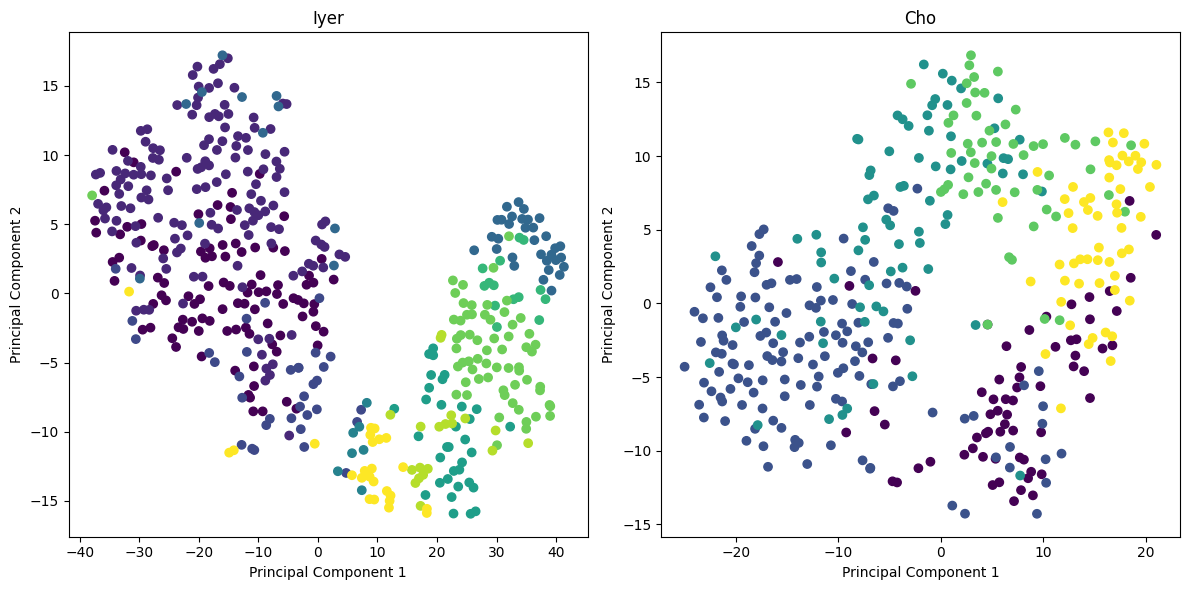

In [43]:
# Test if PCA or t-SNE are better for visualizing in 2-dimensions

# PCA
pca = PCA(n_components=2)
X_iyer_PCA = pca.fit_transform(X_iyer_scaled)
X_cho_PCA = pca.fit_transform(X_cho_scaled)


# t-SNE
tsne = TSNE()
X_iyer_tSNE = tsne.fit_transform(X_iyer_scaled)
X_cho_tSNE = tsne.fit_transform(X_cho_scaled)


# Plot PCA
print('PCA')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_iyer_PCA[:, 0], X_iyer_PCA[:, 1], c=y_iyer)
plt.title('Iyer')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_cho_PCA[:, 0], X_cho_PCA[:, 1], c=y_cho)
plt.title('Cho')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Plot tSNE
print('t-SNE')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_iyer_tSNE[:, 0], X_iyer_tSNE[:, 1], c=y_iyer)
plt.title('Iyer')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_cho_tSNE[:, 0], X_cho_tSNE[:, 1], c=y_cho)
plt.title('Cho')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [44]:
def visualize_results(X, y, y_pred):
    # Visualize actual clustering and predicted clustering side-by-side
    # Use t-SNE as it shows the true clusters more clearly
    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)

    plt.figure(figsize=(12, 6))

    # Plot actual clusters
    plt.subplot(1, 2, 1)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
    plt.title('Actual Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Plot the predicted clusters
    plt.subplot(1, 2, 2)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred)
    plt.title('Predicted Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.tight_layout()
    plt.show()

# K-means

In [22]:
def execute_Kmeans(X, y, n):
    # Initialize, fit, and predict with kmeans++
    kmeans = KMeans(n_clusters=n, random_state=1, init='k-means++', n_init='auto')
    y_pred = kmeans.fit_predict(X)

    # Evaluate the results (Adjusted Rand Index)
    ari_kmeans = adjusted_rand_score(y, y_pred)
    print(f'Adjusted Rand Index: {ari_kmeans}')

    # Visualize results
    visualize_results(X, y, y_pred)

Iyer Data Results
Adjusted Rand Index: 0.29403815251369486


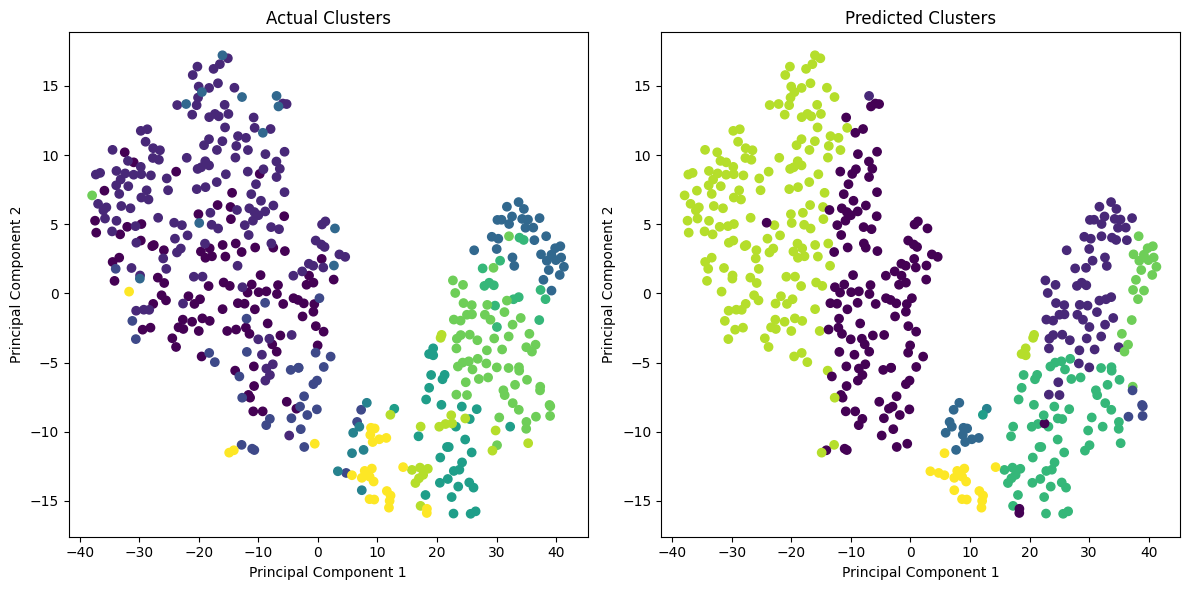

Cho Data Results
Adjusted Rand Index: 0.4423069607596498


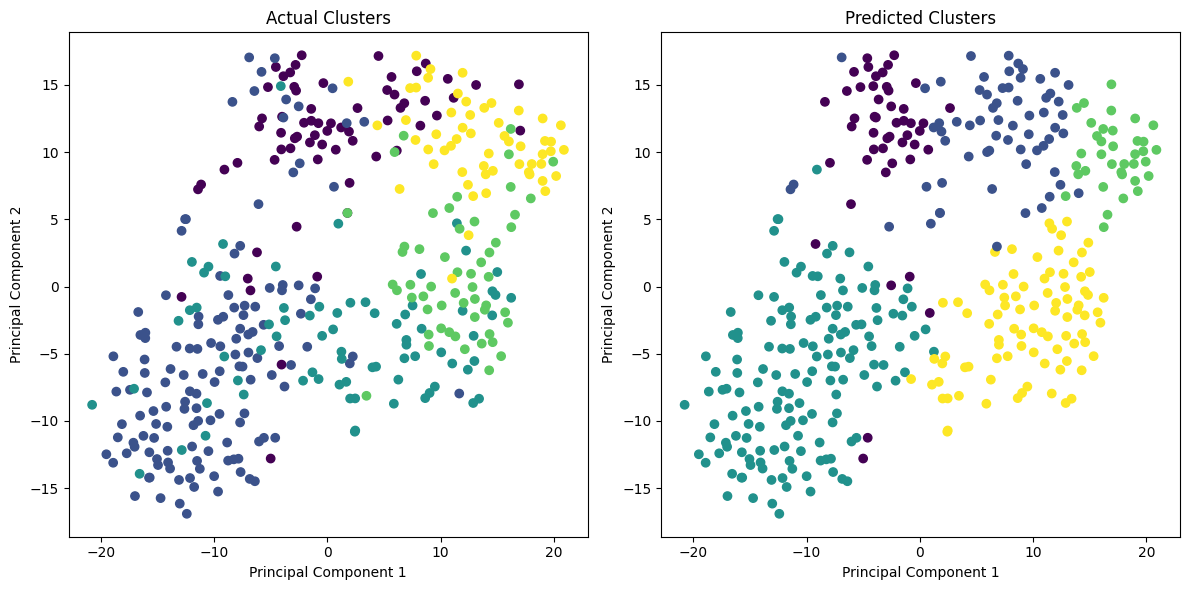

In [23]:
print('Iyer Data Results')
execute_Kmeans(X_iyer_scaled, y_iyer, 10)

print('Cho Data Results')
execute_Kmeans(X_cho_scaled, y_cho, 5)

# DBSCAN

In [47]:
def execute_DBSCAN(X, y):
    # Testing a grid of parameters for DBSCAN and print the best results

    # Calculate avg pairwise distances between points
    avg_pw_dist = np.mean(pdist(X, metric='euclidean'))

    # Define parameter grid for grid search.

    # Scale eps values with the average pairwise distance between points
    eps_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    eps_list_scaled = [x * avg_pw_dist for x in eps_list]

    # scale some values of min_samples with number of samples in dataset
    param_grid = {
        'eps': eps_list_scaled,
        'min_samples': [2, 5, 10, round(len(X)*.05), round(len(X)*.1),
                        round(len(X)*.2)]
    }
    print(f'Parameter grid: {param_grid}')

    best_score = -1
    best_params = None

    # Iterate over entire grid
    for params in ParameterGrid(param_grid):
        # Initialize, fit, and predict with DBSCAN
        dbscan = DBSCAN(**params)
        y_pred = dbscan.fit_predict(X)

        # Evaluate the results (Adjusted Rand Index)
        score = adjusted_rand_score(y, y_pred)
        if score > best_score:
            # Save the best params and resulting score
            best_score = score
            best_params = params
            print(f'New best ARI: {score} found with params: {params}')

    # Fit the best model
    print(f'Best Model: includes {len(set(y_pred))} clusters')
    print(f'Best ARI: {best_score} with params: {best_params}')

    dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    y_pred = dbscan.fit_predict(X)

    # Visualize results
    visualize_results(X, y, y_pred)

Iyer Dataset:
Parameter grid: {'eps': [0.032780431537483105, 0.16390215768741556, 0.3278043153748311, 0.6556086307496622, 0.9834129461244931, 1.3112172614993245, 1.6390215768741554, 1.9668258922489863, 2.2946302076238174, 2.622434522998649, 2.9502388383734797, 3.278043153748311], 'min_samples': [2, 5, 10, 24, 48, 97]}
New best ARI: 0.0 found with params: {'eps': 0.032780431537483105, 'min_samples': 2}
New best ARI: 0.020627661493552902 found with params: {'eps': 0.3278043153748311, 'min_samples': 2}
New best ARI: 0.31676286017790256 found with params: {'eps': 0.6556086307496622, 'min_samples': 2}
Best Model: includes 2 clusters
Best ARI: 0.31676286017790256 with params: {'eps': 0.6556086307496622, 'min_samples': 2}


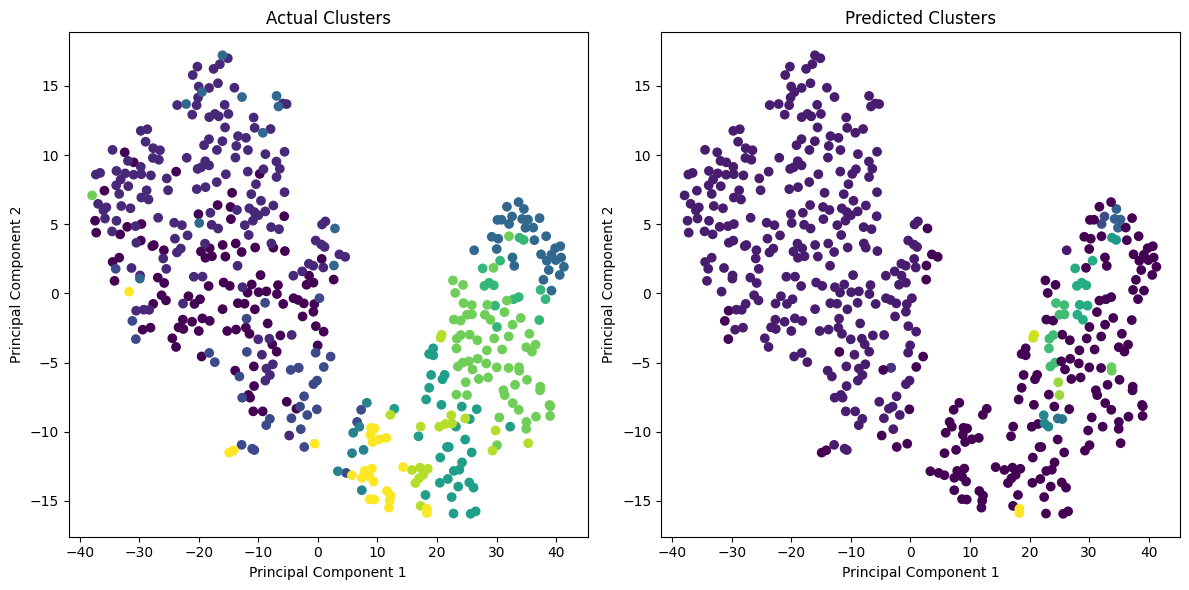

Cho Dataset:
Parameter grid: {'eps': [0.05331233653973684, 0.26656168269868424, 0.5331233653973685, 1.066246730794737, 1.5993700961921051, 2.132493461589474, 2.665616826986842, 3.1987401923842103, 3.731863557781579, 4.264986923178948, 4.798110288576316, 5.331233653973684], 'min_samples': [2, 5, 10, 19, 38, 77]}
New best ARI: 0.0020108583501109376 found with params: {'eps': 0.05331233653973684, 'min_samples': 2}
New best ARI: 0.01867074900487974 found with params: {'eps': 1.5993700961921051, 'min_samples': 2}
New best ARI: 0.03022003906911849 found with params: {'eps': 2.132493461589474, 'min_samples': 2}
New best ARI: 0.04516104015197806 found with params: {'eps': 2.132493461589474, 'min_samples': 5}
New best ARI: 0.07840898274531849 found with params: {'eps': 2.132493461589474, 'min_samples': 10}
New best ARI: 0.13551294777814074 found with params: {'eps': 2.665616826986842, 'min_samples': 38}
Best Model: includes 2 clusters
Best ARI: 0.13551294777814074 with params: {'eps': 2.6656168

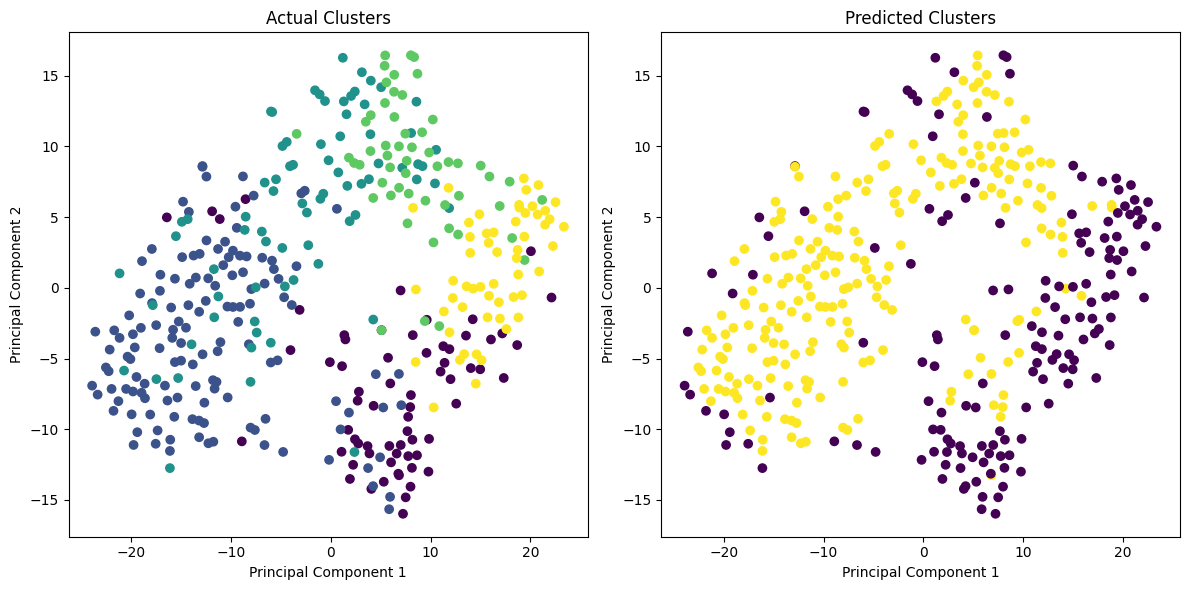

In [48]:
print('Iyer Dataset:')
execute_DBSCAN(X_iyer_scaled, y_iyer)

print('Cho Dataset:')
execute_DBSCAN(X_cho_scaled, y_cho)

# Spectral

In [49]:
def execute_spectral(X, y, n):
    # Test RBF construction with varying gamma parameter, then test NN
    # construction with varying n_neighbors parameter


    # First, test rbf
    gamma_grid = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

    best_score = -1
    best_affinity = None
    best_param = -1

    for g in gamma_grid:
        spectral = SpectralClustering(n_clusters=n, affinity='rbf', gamma=g,
                                  random_state=1)
        y_pred = spectral.fit_predict(X)

        # Evaluate the results (Adjusted Rand Index)
        score = adjusted_rand_score(y, y_pred)

        if score > best_score:
            best_score = score
            best_affinity = 'rbf'
            best_param = g
            print(f'New best ARI: {score} found with {best_affinity}, gamma = {g}')


    # Next, test nearest neighbors
    n_neighbors_grid = [5, 10, 15, 20, 25]
    for nn in n_neighbors_grid:
        spectral = SpectralClustering(n_clusters=n, affinity='nearest_neighbors',
                                      n_neighbors=nn, random_state=1)
        y_pred = spectral.fit_predict(X)

        # Evaluate the results (Adjusted Rand Index)
        score = adjusted_rand_score(y, y_pred)

        if score > best_score:
            best_score = score
            best_affinity = 'nearest_neighbors'
            best_param = nn
            print(f'New best ARI: {score} found with {best_affinity}, nn = {nn}')



    # Fit the best model
    if best_affinity == 'rbf':
        spectral = SpectralClustering(n_clusters=n, affinity='rbf', gamma=best_param,
                                random_state=1)
    else:
        spectral = SpectralClustering(n_clusters=n, affinity='nearest_neighbors',
                                      n_neighbors=best_param, random_state=1)

    y_pred = spectral.fit_predict(X)

    # Visualize results
    print(f'Best model uses {best_affinity}, with parameter = {best_param}')
    print(f'ARI score = {best_score}')
    visualize_results(X, y, y_pred)

New best ARI: 0.23831723548091863 found with rbf, gamma = 0.001
New best ARI: 0.28446871493480713 found with rbf, gamma = 0.01
Best model uses rbf, with parameter = 0.01
ARI score = 0.28446871493480713


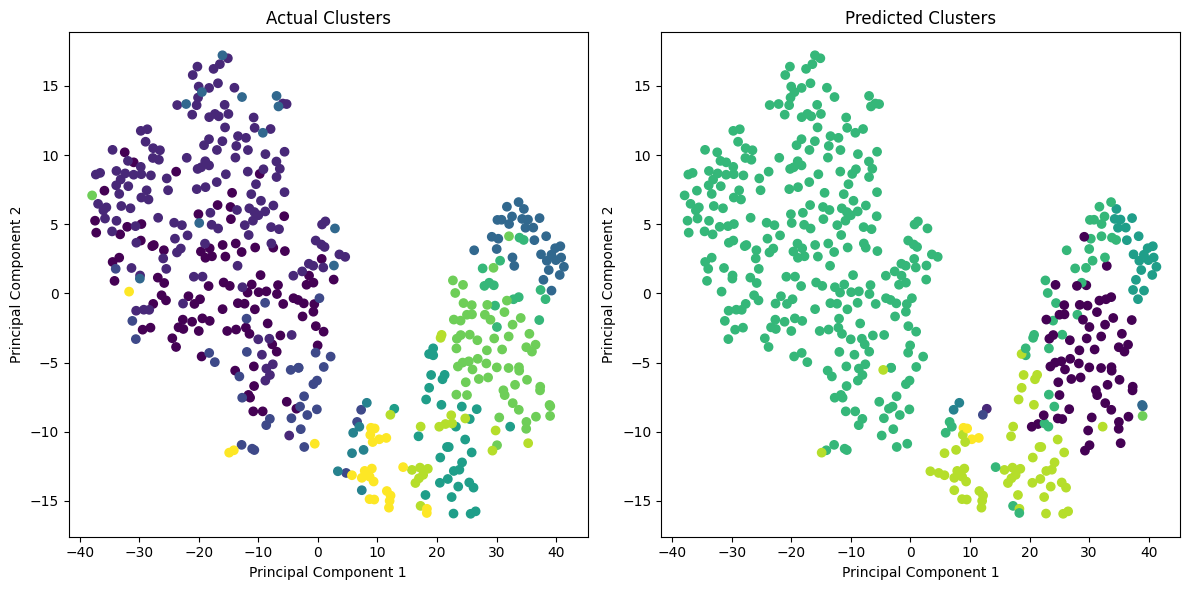

New best ARI: 0.38148803906347806 found with rbf, gamma = 0.001
New best ARI: 0.4001310490888643 found with rbf, gamma = 0.01
New best ARI: 0.4349597608246203 found with rbf, gamma = 0.1
New best ARI: 0.4437173878074081 found with nearest_neighbors, nn = 5
New best ARI: 0.4445598454575456 found with nearest_neighbors, nn = 10
Best model uses nearest_neighbors, with parameter = 10
ARI score = 0.4445598454575456


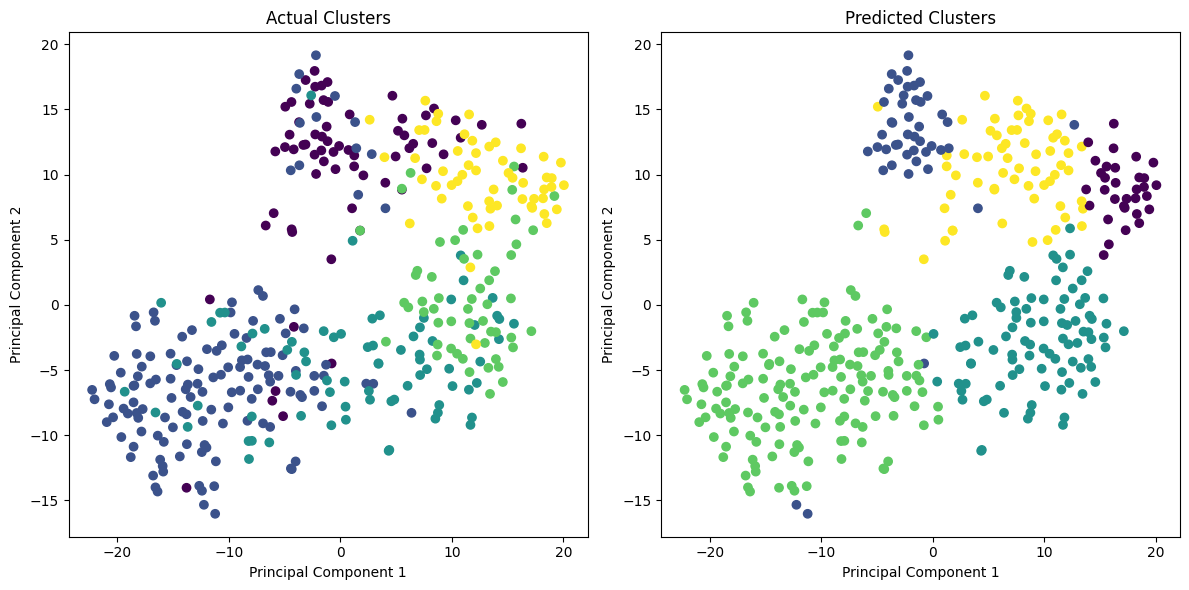

In [50]:
import warnings

# Suppress warnings for a specific cell
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    execute_spectral(X_iyer_scaled, y_iyer, 10)
    execute_spectral(X_cho_scaled, y_cho, 5)